# **Forecasting PM2.5 using big data analysis.**




# Importing necessary packages and libraries:

In [ ]:
from datetime import datetime as dt
import pandas as pd

import arcgis
from arcgis.gis import GIS
from arcgis.geoanalytics.manage_data import run_python_script

In [ ]:
gis = GIS('https://pythonapi.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')


# Ensure your GIS supports GeoAnalytics

In [ ]:
arcgis.geoanalytics.is_supported()

True


# Prepare data

In [ ]:
bigdata_datastore_manager = arcgis.geoanalytics.get_datastores()
bigdata_datastore_manager

<DatastoreManager for https://pythonapi.playground.esri.com/ga/admin>

In [ ]:
bigdata_fileshares = bigdata_datastore_manager.search()
bigdata_fileshares

[<Datastore title:"/bigDataFileShares/NYC_taxi_data15" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/GA_Data" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ServiceCallsOrleansTest" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/calls" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/csv_table" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/all_hurricanes" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/NYCdata" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/hurricanes_1848_1900" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ServiceCallsOrleans" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/hurricanes_dask_csv" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/Chicago_Crimes" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/hurricanes_dask_shp" type:"bigDataFileShare">,
 <Datastore title:"/cloudStores/cloud


# Get data for analysis

In [ ]:
aqs_data = gis.content.search("bigDataFileShares_GA_Data", item_type = "big data file share")[0]
aqs_data

<Item title:"bigDataFileShares_GA_Data" type:Big Data File Share owner:arcgis_python>

In [ ]:
air_lyr = aqs_data.layers[0]
air_lyr.properties

{
  "dataStoreID": "0e7a861d-c1c5-4acc-869d-05d2cebbdbee",
  "fields": [
    {
      "name": "State Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "County Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Site Num",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Parameter Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "POC",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Latitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "Longitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "Datum",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Parameter Name",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Date Local",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Time Local",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Date GMT",
      "type": "esriFieldTypeString"
    },
    {
  

<Item title:"usaCounties" type:Feature Layer Collection owner:api_data_owner>
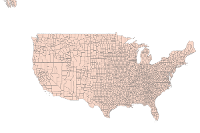

In [ ]:
usa_counties = gis.content.get('5c6ef8ef57934990b543708f815d606e')
usa_counties

In [ ]:
usa_counties_lyr = usa_counties.layers[0]


Uncover patterns in data

In [ ]:
from arcgis.geoanalytics.summarize_data import describe_dataset

In [ ]:
description = describe_dataset(input_layer=air_lyr,
                        extent_output=True,
                        sample_size=1000,
                        output_name="describe dataset",
                              return_tuple=True)

In [ ]:
m1 = gis.map('USA')
m1

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
def measurement_type():
    from datetime import datetime as dt
    # Load the big data file share layer into a DataFrame
    df = layers[0]
    out = df.groupBy('Method Name','Parameter Name').count()
    out.write.format("webgis").save("common_method_type" + str(dt.now().microsecond))

In [ ]:
method_item = gis.content.search('common_method_type')[0]

In [ ]:
run_python_script(code=measurement_type, layers=[air_lyr])

In [ ]:
method_df = method_item.tables[0].query(as_df=True)

In [ ]:
method_df.sort_values(by='count', ascending=False)

,Method_Name,Parameter_Name,count,globalid,OBJECTID
219,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Ozone,10650047,{1FC75F52-DB81-B091-056F-368283C77C33},312
6,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Outdoor Temperature,9808818,{013B66EB-E352-FC3F-2339-DCBAC2662375},8
266,INSTRUMENTAL - ULTRA VIOLET,Ozone,8634142,{A8872DC4-617C-27B9-EB79-8C958B7B0242},398
213,INSTRUMENTAL - VECTOR SUMMATION,Wind Direction - Resultant,7348868,{176D788A-2F7F-5BE8-691F-8456156D4397},303
184,INSTRUMENTAL - VECTOR SUMMATION,Wind Speed - Resultant,7267098,{E2FBC9D6-B366-3DCA-FF8D-7355411D457A},255
...,...,...,...,...,...
100,Cooper Environmental Services model Xact 620 -...,Vanadium PM10 LC,105,{4F346FAE-D745-5F69-3DEE-C3B019802C86},126
12,Cooper Environmental Services model Xact 620 -...,Calcium PM10 LC,105,{A76DC73F-4832-2DE3-4D8F-E9546C0C059D},17
245,Cooper Environmental Services model Xact 620 -...,Silver PM10 LC,105,{3EF0D033-D9F0-5D47-DB61-30E70EDFCEE4},356
109,Cooper Environmental Services model Xact 620 -...,Tin PM10 LC,105,{B04CACD8-6BD0-A25C-2BC7-2B6EC1BB0D2C},139



# Average PM 2.5 value by county

In [ ]:
def average():
    from datetime import datetime as dt
    df = layers[0]
    df = df.filter(df['Parameter Name'] == 'PM2.5 - Local Conditions')
    res = geoanalytics.join_features(target_layer=layers[1], 
                                     join_layer=df, 
                                     join_operation="JoinOneToOne",
                                     summary_fields=[{'statisticType' : 'mean', 'onStatisticField' : 'Sample Measurement'}],
                                     spatial_relationship='Contains')
    res.write.format("webgis").save("average_pm_by_county" + str(dt.now().microsecond))

In [ ]:
run_python_script(average, [air_lyr, usa_counties_lyr])

In [ ]:
average_pm_by_county = gis.content.search('average_pm_by_county')[0]

In [ ]:
average_pm_by_county

<Item title:"average_pm_by_county" type:Feature Layer Collection owner:arcgis_python>

In [ ]:
avg_pm = average_pm_by_county.layers[0]

In [ ]:
avg_pm.query(as_df=True).columns

In [ ]:
m2 = gis.map('USA')
m2

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
m2.add_layer(avg_pm, {"type": "FeatureLayer",
                      "renderer":"ClassedColorRenderer",
                      "field_name":"MEAN_Sample_Measurement",
                      "class_breaks": 6})

In [ ]:
m2.zoom_to_layer(avg_pm)
m2.legend=True

# Prepare time series data


In [ ]:
def data_processsing():
    from datetime import datetime as dt
    import pyspark.sql.functions as F
    from pyspark.sql.functions import concat, col, lit
    # Load the big data file share layer into a DataFrame.
    df = layers[0] #converts feature layer to spark dataframe
    cols = ['Site Num', 'County Code', 'State Code', 'Date Local', 'Time Local', 'Parameter Name', 'Sample Measurement']
    df = df.select(cols) #create a subset of the dataset with only selected columns
    df = df.withColumn('Site_Num', F.lpad(df['Site Num'], 4, '0'))
    df = df.withColumn('County_Code', F.lpad(df['County Code'], 3, '0'))
    df = df.withColumn('State_Code', F.lpad(df['State Code'], 2, '0'))
    df = df.withColumn('unique_id', F.concat(F.col('State_Code'), F.col('County_Code'), F.col('Site_Num')))
#     drop_cols = ['Site_Num', 'County_Code', 'State_Code', 'Site Num', 'County Code', 'State Code']
    df = df.drop('Site_Num', 'County_Code', 'Staate_Code', 'Site Num', 'County Code', 'State Code')
    df = df.withColumn('datetime', concat(col("Date Local"), lit(" "), col("Time Local")))
#     drop_cols = ['Time Local', 'Date Local']
    df = df.drop('Time Local', 'Date Local')
    df = df.filter(df.unique_id == df.first().unique_id) #filter by only one station
    # group the dataframe by datetime,unique_id field and pivot the table to get variables needed for prediction as columns  
    df = df.groupby(df['datetime'], df['unique_id']).pivot("Parameter Name").avg("Sample Measurement")

    df.write.format("webgis").save("timeseries_data_17_18_19_1station" + str(dt.now().microsecond))# it will run only if it is connected to DB

In [ ]:
run_python_script(code=data_processsing, layers=[air_lyr], gis=gis)

In [ ]:
data = gis.content.search('timeseries_data_17_18_19_1station')[0]
data

<Item title:"timeseries_data_17_18_19_1station666902" type:Table Layer owner:arcgis_python>

In [ ]:
series_data = data.tables[0]

In [ ]:
series_data.query(as_df=True)[:5]

,Barometric_pressure,Carbon_monoxide,Nitric_oxide__NO_,Nitrogen_dioxide__NO2_,OBJECTID,Outdoor_Temperature,Oxides_of_nitrogen__NOx_,Ozone,PM10_Total_0_10um_STP,PM2_5___Local_Conditions,Reactive_oxides_of_nitrogen__NOy_,Relative_Humidity,Sulfur_dioxide,Wind_Direction___Resultant,Wind_Speed___Resultant,datetime,globalid,unique_id
0,1004.3,0.133,0.80,1.8,1,54.3,2.6,0.039,NaN,3.6,2.5,35.0,0.3,73.0,4.4,2017-02-13 10:00,{8CA1B4E4-C3D4-790C-1F7D-5C51972DBE06},010730023
1,996.3,NaN,0.15,12.3,2,46.4,12.6,0.018,NaN,13.2,13.0,59.0,0.6,73.0,3.5,2017-12-14 22:00,{77B49E92-0811-7E36-8F65-2F53EF6EB173},010730023
2,995.8,NaN,31.40,21.5,3,66.2,55.9,0.007,50.0,19.0,48.5,69.0,6.4,150.0,2.0,2017-05-26 06:00,{C908147A-DC90-9163-E39E-FEABA7C3CE6E},010730023
3,988.7,0.141,0.90,2.9,4,92.7,4.1,0.036,52.0,25.6,4.9,42.0,0.9,269.0,4.1,2018-06-20 14:00,{C60C1BC4-A50A-DAD4-9DC9-3788C83E2826},010730023
4,1001.9,0.361,1.20,14.4,5,61.9,15.7,0.029,NaN,4.5,13.0,31.0,4.0,201.0,4.0,2017-02-10 19:00,{8474318E-C39B-AC50-BAB1-787192998B4B},010730023



# Predict PM2.5 using Facebook's Prophet model

In [ ]:
def predict_pm25():
    #imports
    from arcgis.gis import GIS
    gis = GIS(profile="your_enterprise_portal")
    from datetime import datetime as dt
    from pyspark.sql.functions import concat, col, lit
    import pandas as pd
    import numpy as np
    from fbprophet import Prophet
    from pyspark.sql.functions import pandas_udf, PandasUDFType
    from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, FloatType, TimestampType
    import warnings
    warnings.filterwarnings('ignore')
    
    df1 = layers[0] #converts laayer into spark dataframe
    cols = ['Outdoor_Temperature', 'Ozone', 'PM10_Total_0_10um_STP',
        'PM2_5___Local_Conditions',
        'Wind_Direction___Resultant',
        'Wind_Speed___Resultant', 'datetime']
    df1 = df1.select(cols) #filter data by columns needed
    df1 = df1.withColumn('flag', lit(1))
    schema = StructType([StructField('ds', TimestampType(), True), #schema of the resulting dataframe
                         StructField('yhat_lower', FloatType(), True),
                         StructField('yhat_upper', FloatType(), True),
                         StructField('yhat', FloatType(), True),
                         StructField('y', FloatType(), True)])
    
    @pandas_udf(schema, PandasUDFType.GROUPED_MAP)
    def forecast_pm25(df):
        #prepare data 
        df['Date'] = df['datetime'].astype('datetime64[ns]')
        df['year'] = df['Date'].dt.year
        df.set_index('Date', inplace=True) 
        df.sort_index(inplace=True)
        v = pd.date_range(start='2016-12-31 23:00:00', periods=18265, freq='H', closed='right') #get date range
        newdf = pd.DataFrame(index=v) 
        # Fill missing dates 
        historical=pd.merge(newdf, df, how='left', left_index=True, right_index=True)
        historical.interpolate(method='time', inplace=True)
        historical.reset_index(inplace=True)
        historical.rename(columns={'index': 'ds', 'PM2_5___Local_Conditions': 'y'}, inplace=True)
        historical.fillna(0, inplace=True)
        # handle zero and negative values for pm
        for i,item in enumerate(historical['y']):
            if item<=0:
                historical['y'].iloc[i]=historical['y'].iloc[i-1]
            else:
                historical['y'].iloc[i]=item
                
        for i,item in enumerate(historical['PM10_Total_0_10um_STP']):
            if item<=0:
                historical['PM10_Total_0_10um_STP'].iloc[i]=historical['PM10_Total_0_10um_STP'].iloc[i-1]
            else:
                historical['PM10_Total_0_10um_STP'].iloc[i]=item        
         
        for i,item in enumerate(historical['Wind_Speed___Resultant']):
            if item<=0:
                historical['Wind_Speed___Resultant'].iloc[i]=historical['Wind_Speed___Resultant'].iloc[i-1]
            else:
                historical['Wind_Speed___Resultant'].iloc[i]=item
        
        for i,item in enumerate(historical['Wind_Direction___Resultant']):
            if item<=0:
                historical['Wind_Direction___Resultant'].iloc[i]=historical['Wind_Direction___Resultant'].iloc[i-1]
            else:
                historical['Wind_Direction___Resultant'].iloc[i]=item
        # split data into train and test        
        train_df = historical[historical.year != 2019]
        test_df = historical[historical.year == 2019]
        test_df.drop(columns='y', inplace=True)        
        # train model    
        m = Prophet(daily_seasonality=True,
                    weekly_seasonality=True)
        m.add_regressor('PM10_Total_0_10um_STP')
        m.add_regressor('Wind_Speed___Resultant')
        m.add_regressor('Wind_Direction___Resultant')
        m.fit(train_df);
        # predict on test data
        forecast = m.predict(test_df)
        # save plots locally
        plot1 = m.plot(forecast);
        plot2 = m.plot_components(forecast);
        plot1.savefig(r'/home/ags/localdatastore/fbdata/forecast.png')
        plot2.savefig(r'/home/ags/localdatastore/fbdata/cmponents.png')
        cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
        cmp_df.reset_index(inplace=True)
        cmp_df = cmp_df[['ds', 'yhat_lower', 'yhat_upper', 'yhat', 'y']]
        return cmp_df
    res = df1.groupby(['flag']).apply(forecast_pm25)

    res.write.format("webgis").save("predicted_results_on_test_data" + str(dt.now().microsecond)) # It will run only if it is connected to DB 

In [ ]:
run_python_script(code=predict_pm25, layers=[series_data])

In [ ]:
predicted_item = gis.content.search('predicted_results_on_test_data854829')
predicted_item

[]

In [ ]:
predicted_df = predicted_item[1].tables[1].query().sdf

In [ ]:
predicted_df.columns


# Visualize result on Dashboard

In [ ]:
from arcgis.apps.dashboard import SerialChart, add_column, add_row
from arcgis.apps.dashboard import Dashboard
from arcgis.apps.dashboard import SerialChart

In [ ]:
chart = SerialChart(predicted_item,  #Create a serial chart
                    categories_from="features", 
                    title="Forecast of PM2.5 for Janumary 2019") 

chart.data.category_field = "ds" #set category field

chart.category_axis.title = "datetime" #set title for x axis

chart.value_axis.title = "pm2.5" #set title for y axis

#set fields to visualize on y axis
chart.data.add_value_field('y', line_color='#CB4335') 
chart.data.add_value_field('yhat', line_color='#2980B9')
chart.data.add_value_field('yhat_upper', line_color='#CACFD2')
chart.data.add_value_field('yhat_lower', line_color='#CACFD2')

chart.legend.visibility = True 
chart.legend.placement = "side"
chart.category_axis.minimum_period = 'hours'
chart.data.labels = False
chart.data.hover_text = True
chart.data.hover_text = True
chart

In [ ]:
agol_gis = GIS('home')

/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:430: UserWarning: You are logged on as gis_it_mcgm with an administrator role, proceed with caution.
  self.users.me.username)


In [ ]:
dashboard = Dashboard() #creates a Dashboard object
dashboard.layout = add_row([a_chart]) #adds one chat to the Dashboard
dashboard.save('pm2.5_dashboard_2019_jan',  #publishes the dashboard to the portal
               gis=agol_gis)